# Crop Recommendation System

## Business Understanding

### Problem Statement :

Farmers face significant challenges in maximizing crop yield, primarily due to the improper selection and application of fertilizers.

Among the challenges farmers face include:
- Crop Selection Uncertainty: Farmers may not know which crops are best suited for their soil and climate conditions, leading to poor yields and economic loss.


- Fertilizer Mismanagement: Incorrect use of fertilizers can result in soil nutrient imbalances, affecting crop health and yield. Farmers may not know the right type or amount of fertilizer required for their crops.


- Plant Disease Identification: Identifying plant diseases can be difficult for farmers, especially without expert knowledge. Delayed or incorrect diagnosis can lead to severe crop damage and lower productivity.

To enhance decision-making, a data-driven recommendation system is needed that provides personalized, actionable insights.

### Objective

The primary goal of this project is to develop an intelligent crop and fertilizer recommendation system that assists farmers in optimizing their farming practices. The system will recommend the most suitable crops and fertilizers based on factors such as soil composition, crop type and weather patterns. By leveraging machine learning and data analytics, the system aims to improve crop yields, reduce costs, and promote sustainable agricultural practices.


### Solutions and Benefits

The solutions the recommendation sytem will provide include:

- Crop Recommendation: By using machine learning to analyze soil data provided by the user, your application can predict the most suitable crops for a specific soil type, enabling farmers to make informed decisions and improve yields.


- Fertilizer Recommendation: Based on the user's soil data and the type of crop they are growing, the application can recommend the appropriate fertilizer by identifying any deficiencies or excess nutrients in the soil, ensuring better crop growth and healthier soil.


- Plant Disease Prediction: The image recognition feature allows users to upload images of diseased plant leaves. The application then predicts the disease and offers background information and treatment suggestions, enabling timely and effective intervention.


The key benefits of using our recommendation system include:
1. Increased Crop Yield: Farmers will receive precise recommendations for crops and fertilizers, leading to significant improvements in crop productivity.
2. Cost Efficiency: By optimizing fertilizer use and avoiding over-application, farmers can reduce costs while maintaining or increasing yields.
3. Sustainability: The system will promote responsible fertilizer use, reducing the risk of soil degradation and environmental pollution.
4. Personalized Recommendations: Tailored insights based on specific farm conditions (soil properties, climate, and crop type) ensure relevant and actionable advice for each farmer.
5. Disease Management: By integrating plant disease prediction features, the system can help farmers identify and treat crop diseases in a timely manner, minimizing losses.

## Data Understanding

- Crop Dataset: Contains information on various crops, including environmental conditions (temperature, humidity, pH), soil type, and yield data. This data helps identify suitable crops for specific conditions and regions.


- Fertilizer Dataset: Contains details on different fertilizers and their effects on various crops. This is key for understanding optimal fertilizer types and quantities for improved yield.


- Disease Dataset: Includes data on plant diseases, symptoms, affected crops, and preventive measures. Understanding disease patterns is essential for timely diagnosis and prevention.



### Feature Distributions

- Numerical Variables: Summarizing key statistics for temperature, humidity, soil pH, etc., to understand typical ranges, outliers, and potential skewness in values.


- Categorical Variables: Exploring the diversity in crop types, soil types, and fertilizer types. This helps determine the coverage and variety in the data.



In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


In [2]:
#Loading the datasets
#crop_data = pd.read_csv('cpdata.csv')
#fertilizer_data = pd.read_csv('Fertilizer.csv')
#crop_yield = pd.read_csv('raw_districtwise_yield_data.csv')

In [8]:
#Function for changing all words in array to lower case 
def change_case(i):
    i = i.replace(" ","")
    i = i.lower()
    return i

In [9]:
#Applying the function
fertilizer_data['Crop'] = fertilizer_data['Crop'].apply(change_case)
crop_data['label'] = crop_data['label'].apply(change_case)


In [10]:
fertilizer_data_unique = fertilizer_data['Crop'].unique()
fertilizer_data_unique 

array(['rice', 'jowar(sorghum)', 'barley(jav)', 'maize',
       'ragi(naachnnii)', 'chickpeas(channa)', 'frenchbeans(farasbi)',
       'favabeans(papdi-val)', 'limabeans(pavta)', 'clusterbeans(gavar)',
       'soyabean', 'blackeyedbeans(chawli)', 'kidneybeans',
       'pigeonpeas(toordal)', 'mothbean(matki)', 'mungbeans', 'greenpeas',
       'horsegram(kulthi)', 'blackgram', 'rapeseed(mohri)',
       'corianderseeds', 'mustardseeds', 'sesameseed', 'cuminseeds',
       'lentils(masoordal)', 'brinjal', 'beetroot', 'bittergourd',
       'bottlegourd', 'capsicum', 'cabbage', 'carrot', 'cauliflower',
       'cucumber', 'corianderleaves', 'curryleaves', 'drumstick–moringa',
       'chili', 'ladyfinger', 'mushroom', 'onion', 'potato', 'pumpkin',
       'radish', 'olive', 'sweetpotato', 'fenugreekleaf(methi)',
       'spinach', 'ridgegourd', 'gooseberry(amla)',
       'jambun(syzygiumcumini)', 'ziziphusmauritiana(bor)',
       'garciniaindica(kokam)', 'tamarind', 'tapioca(suran)', 'garlic',
  

In [11]:
crop_data_unique = crop_data['label'].unique()
crop_data_unique 

array(['rice', 'wheat', 'mungbean', 'tea', 'millet', 'maize', 'lentil',
       'jute', 'coffee', 'cotton', 'groundnut', 'peas', 'rubber',
       'sugarcane', 'tobacco', 'kidneybeans', 'mothbeans', 'coconut',
       'blackgram', 'adzukibeans', 'pigeonpeas', 'chickpea', 'banana',
       'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya',
       'pomegranate', 'watermelon'], dtype=object)

In [12]:
del fertilizer_data['Unnamed: 0']

In [13]:
extract_labels = []
for i in fertilizer_data_unique:
    if i in crop_data_unique:
        extract_labels.append(i)

In [14]:
extract_labels

['rice',
 'maize',
 'kidneybeans',
 'blackgram',
 'pomegranate',
 'banana',
 'mango',
 'grapes',
 'watermelon',
 'muskmelon',
 'apple',
 'orange',
 'papaya',
 'coconut',
 'cotton',
 'jute',
 'coffee']

## Data Preparation

In [23]:
#loading the dataset
new_data=pd.read_csv('crop_recommendation.csv')
new_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [24]:
#Summary of the dataset
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [25]:
#Checking for missing values
new_data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [26]:
new_data['label'].value_counts()

mothbeans      100
chickpea       100
coffee         100
pomegranate    100
pigeonpeas     100
cotton         100
apple          100
banana         100
grapes         100
maize          100
papaya         100
mungbean       100
muskmelon      100
watermelon     100
blackgram      100
coconut        100
jute           100
kidneybeans    100
mango          100
lentil         100
rice           100
orange         100
Name: label, dtype: int64

In [27]:
new_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


##### Checking the correlation between the features

In [28]:
Numeric_crop = new_data.select_dtypes(include=['float', 'int64'])
corr= Numeric_crop.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot:>

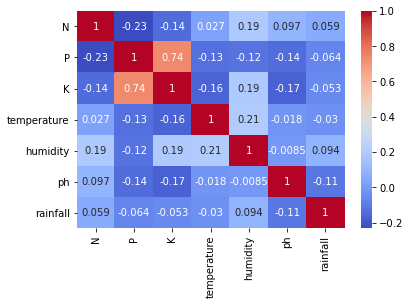

In [30]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

##### Observations:

###### *P and K*:
There is a strong positive correlation (0.74) between Phosphorus and Potassium, suggesting that as levels of one increase, so do levels of the other. This could indicate that these nutrients are often found together or are similarly influenced by soil and environmental conditions.

###### *K and temperature*: 
There is a moderate negative correlation (-0.16) between Potassium and temperature, suggesting that as temperature increases, Potassium levels might slightly decrease.

###### *Humidity and rainfall*: 
There’s a low positive correlation (0.1) between humidity and rainfall, indicating a weak association between these two variables.

###### *pH and other factors*:
pH shows very low correlations with most variables, indicating it is largely independent within this dataset.

Most other variable pairs show very weak correlations (values close to 0), suggesting little to no linear association between them.

In [48]:
#data = new_data

# List of numerical columns for univariate analysis
#numeric_columns = ['temperature', 'humidity', 'ph', 'rainfall', 'N', 'P', 'K']

#sns.set(style="whitegrid")

#Histograms for each numeric feature to check their distribution
#for col in numeric_columns:
    #plt.figure(figsize=(8, 4))
    #sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    #plt.title(f"Distribution of {col}")
    #plt.xlabel(col)
    #plt.ylabel("Frequency")
    #plt.show()

## Exploratory Data Analysis

### Univariate Analysis

Plotting Distribution of each feature

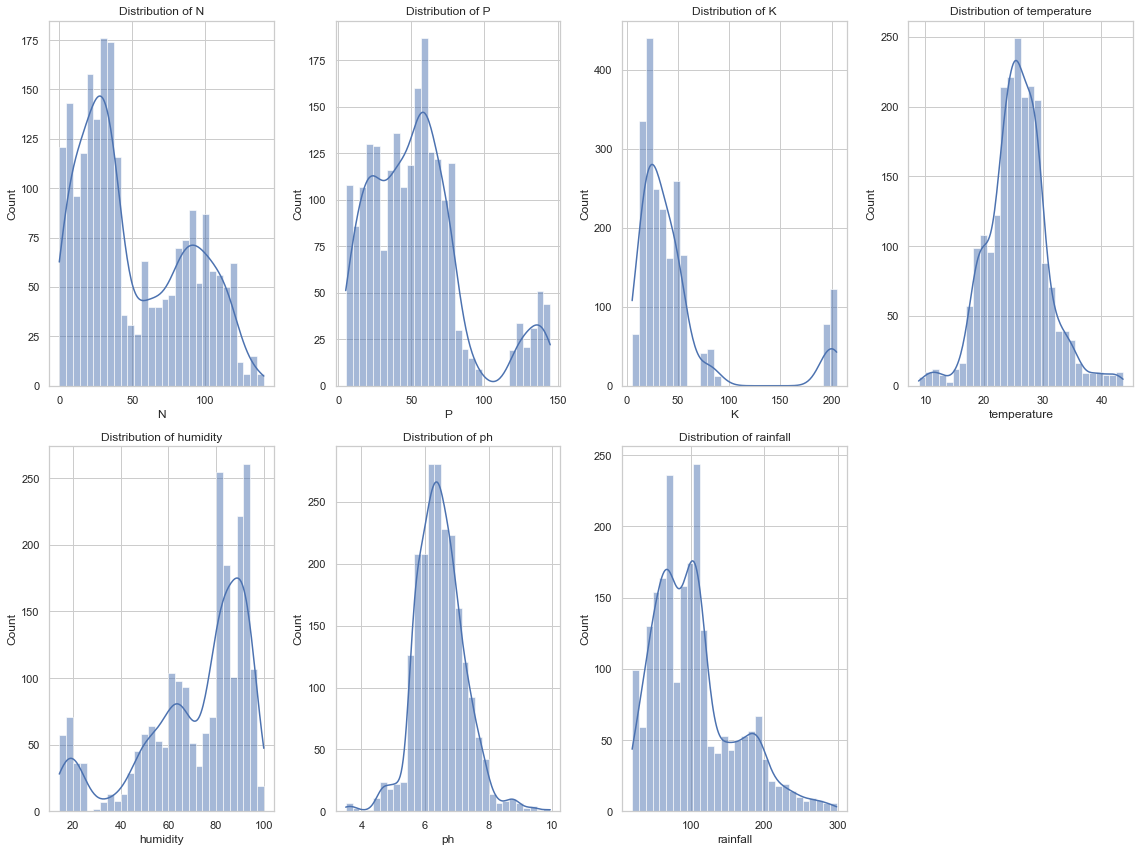

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# Plot the distribution of each feature in a 2x4 grid
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

### Bivariate Analysis

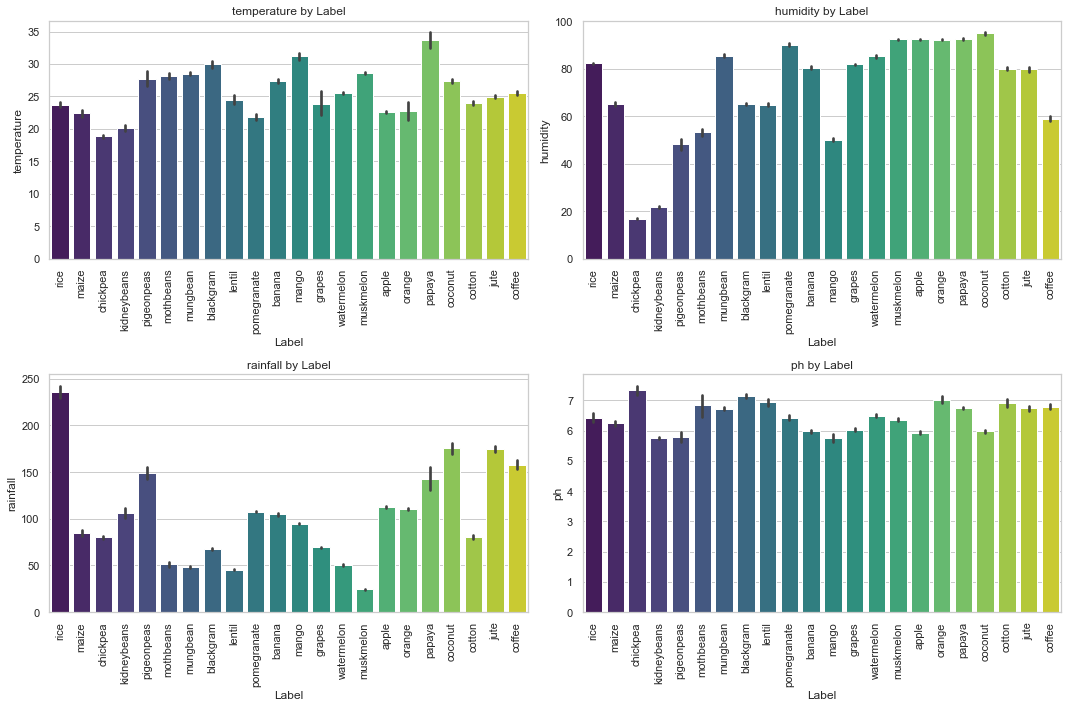

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns to plot
selected_columns = ['temperature', 'humidity', 'rainfall', 'ph']

# Set up the figure size
plt.figure(figsize=(15, 10))

# Loop through each column to create individual bar plots
for i, col in enumerate(selected_columns, 1):
    plt.subplot(2, 2, i)
    sns.barplot(data=new_data, x='label', y=col, palette='viridis')
    plt.title(f'{col} by Label')
    plt.xlabel('Label')
    plt.ylabel(col)
    plt.xticks(rotation=90)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


##### Rainfall by Label (Crop)
###### *High Rainfall Requirements*:
Rice exhibits high rainfall needs, with rainfall levels reaching over 200 mm, indicating these crop thrive in regions with substantial rainfall.
###### *Moderate Rainfall Requirements*:
Pigeonpeas, kidneybeans, pomegranate,apple , orange, papaya, coconut, juite and coffee have moderate rainfall needs, ranging around 100–160 mm.
###### *Low Rainfall Requirements*:
Maize, Chickpea, blackgram, mothbeans, watermelon, mango, grapes and cotton show low rainfall requirements, with values around 50 mm or above, making them suitable for drier regions or low-rainfall climates
###### *Very low rainfall*
Mung beans, lentils, and muskmelon can grow in very low rainfall areas, with requirements below 50 mm, showing their adaptability to dry conditions.

##### pH by Label (Crop)
###### *Neutral to Slightly Acidic pH Tolerance*:
Most crops have an optimal pH level around 6.0 to 7.0, indicating that they prefer neutral to slightly acidic soils.

###### *Slightly Lower pH Requirements*:
Kidneybeans, pigeonpeas, mango, apple and apple has a lower pH tolerance around 5.5 or a little higher, suggesting it can grow in slightly more acidic conditions compared to other crops.

##### Temperature by Label (Crop)
###### *Higher Temperature Preferences*:
Blackgram, Papaya, and mango prefer higher temperatures, around 30°C or above, suggesting they are well-suited for tropical or subtropical climates.
###### *Moderate Temperature Preferences*:
pigeonbeans, mothbeans, mungbean, banana, watermelon, coconut, muskmelon and coffee have moderate temperature requirements, with optimal levels around 25–28°C.
###### *Lower Temperature Preferences*:
Crops like Rice, Maize, chickpeas, kidneybeans, lentil, pomegranate, grapes, apple, orange, cotton and juite  have lower temperature needs, around 25°C or below, making them more adaptable to cooler regions.


##### Humidity by Label (Crop)
###### *High Humidity Requirements*:
Rice, mungbean, pomegranate, Banana, grapes, muskmelon, watermelon,apple, papaya, orange, coconut, cotton and juite exhibit high humidity preferences, with levels around 70%–80% or higher, indicating that these crops thrive in regions with consistently high humidity.
###### *Moderate Humidity Requirements*:
Maize, pigeonpeas, mothbeans, blackgram, lentils, mango and coffee prefer moderately high humidity, around 40%–70%, indicating some flexibility in the growing environment.
###### *Low Humidity Tolerance*:
Chickpeas and kidneybeans  have lower humidity requirements, with values below 30%, indicating that they can be cultivated in drier environments.

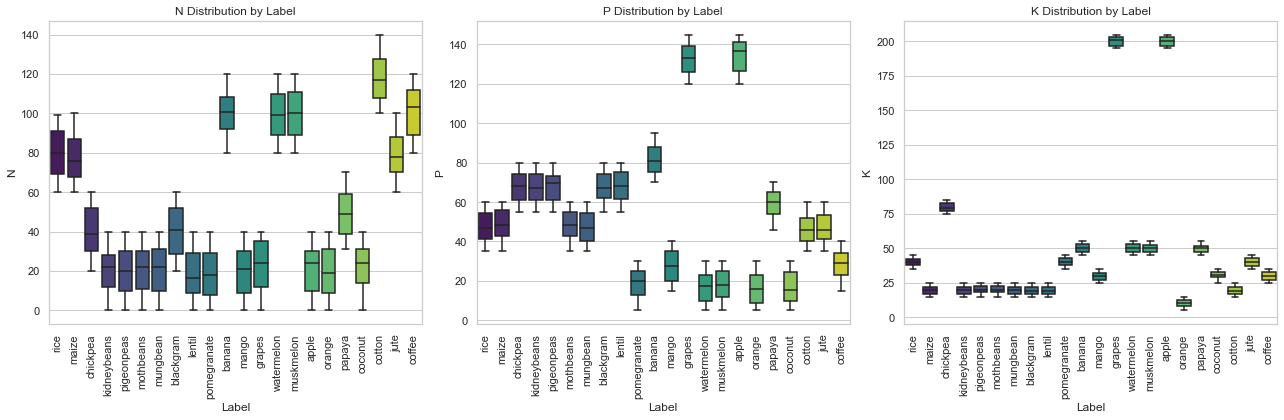

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(18, 6))

# Create box plots for each nutrient
nutrients = ['N', 'P', 'K']
for i, nutrient in enumerate(nutrients, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=new_data, x='label', y=nutrient, palette='viridis')
    plt.title(f'{nutrient} Distribution by Label')
    plt.xlabel('Label')
    plt.ylabel(nutrient)
    plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()


##### Nitrogen (N) Distribution by Label

##### Observations

###### *High-Nitrogen Crops*:

Cotton, coffee, Juite,muskmelon, watermelon,banana, maize and Rice  have high Nitrogen levels, with medians close to or above 80. These crops may require a substantial amount of Nitrogen for optimal growth.   


###### *Moderate-Nitrogen Crops*:

Chickpeas, blackgram, and papaya display moderate Nitrogen levels, with medians around 30-70. These crops have a balanced Nitrogen requirement, neither too high nor too low.
                                                                               
###### *Lower-Nitrogen Crops*:

Rice, chickpea, and lentil have lower Nitrogen levels, with medians around 30–60, indicating they thrive with less Nitrogen input.
   
Crops with a wider range in their Nitrogen levels, with variability across different samples, could reflect different requirements based on specific growth conditions.

#####  Phosphorus (P) Distribution by Crop
###### *High-Phosphorus Crops*:

Grapes and apple stand out with high Phosphorus levels, with medians around 120-140, showing a substantial requirement for this nutrient, rather could be due to environmental or varietal factors.Plays out as outliers.

###### *Moderate-Phosphorus Crops*:
Ricw, Maize, chickpea, kidneybeans, pigeonbeans, mothbean, blackgram, lentil, banana papaya, cotton, and juite have moderate Phosphorus levels, with medians around 40-90, indicating a balanced Phosphorus need.

###### *Lower-Phosphorus Crops*:
Pomegranate, mango, muskmelon, watermelon, orange, coconut and coffee have lower Phosphorus levels, with medians closer to (20–30) suggesting minimal Phosphorus suffices for their growth.


#####  Potassium (K) Distribution by Crop

###### *Ouliers*
There are outliers observed in crops like Grapes and Apple, which have particularly high medians, exceeding 200.

##### *High Pottasium Levels*
Chickpeas exhibit high potassium levels, with a range between 75 and 100, indicating a substantial potassium supply.

###### *Moderate Potassium Levels*:
Rice, pomegranate, banana, Mango, watermelon, muskmelon, papaya,cococnut,jute and coffee show  moderate Potassium levels generally between 25 and 60, suggesting these crops thrive with a balanced potassium supply.
    
###### *Lower Potassium Levels*:
Maize, kidneybeans, pigeonbeans, mothbeans, mungbeans,pigeonpea, mothbeans, and blackgram, lentil, orange and cotton  display lower potassium levels, around 10 to 25, meaning they require only minimal potassium input.                                                                             
###### *Consistent Patterns*:
The Potassium levels show relatively low variability across each crop suggesting consistent Potassium need for most crops in this dataset.